In [1]:
from __future__ import division,print_function,unicode_literals

import numpy as np 
import os 


# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import tensorflow as tf

#Declaration before running TensorFlow session
x = tf.Variable(3,name="x")
y = tf.Variable(4,name="y")

f = x * x * y + y + 2

In [3]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [4]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [5]:
sess.close()

In [6]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [7]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [8]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2) 
    
x2.graph is graph

True

In [9]:
x2.graph is tf.get_default_graph()

False

In [10]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


In [11]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)
    print(z_val)

10
15


In [12]:
import numpy as np 
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias  = np.c_[np.ones((m, 1)),housing.data]

X = tf.constant(housing_data_plus_bias, dtype=np.float32, name="x")
y = tf.constant(housing.target.reshape(-1, 1),dtype=tf.float32,name="y")
XT = tf.transpose(X)
#Theta = (X^T * X)^-1 * X^T*y 
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [13]:
#Values from TensorFlow
theta_value

array([[-3.74659576e+01],
       [ 4.35208052e-01],
       [ 9.34183039e-03],
       [-1.05619654e-01],
       [ 6.38267040e-01],
       [-4.28281601e-06],
       [-3.77140474e-03],
       [-4.26884502e-01],
       [-4.40567464e-01]], dtype=float32)

In [14]:
#Values from NumPy
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [15]:
#Values from Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1,1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [17]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [18]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1, 1),dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n +1, 1],-1.0,1.0, seed=42),name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y;
mse = tf.reduce_mean(tf.square(error),name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch",epoch," MSE = ",mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()

Epoch 0  MSE =  9.161543
Epoch 100  MSE =  0.71450055
Epoch 200  MSE =  0.56670463
Epoch 300  MSE =  0.5555716
Epoch 400  MSE =  0.54881155
Epoch 500  MSE =  0.54363626
Epoch 600  MSE =  0.5396292
Epoch 700  MSE =  0.5365092
Epoch 800  MSE =  0.53406775
Epoch 900  MSE =  0.53214705


In [19]:
best_theta

array([[ 2.0685523 ],
       [ 0.8874028 ],
       [ 0.14401658],
       [-0.34770888],
       [ 0.36178374],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.63752776]], dtype=float32)

In [20]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n +1, 1],-1.0,1.0,seed=42),name="theta")
y_pred = tf.matmul(X, theta,name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")

In [21]:
gradients = tf.gradients(mse, [theta])[0]

In [22]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch,"MSE =",mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()
print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555715
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365091
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.53214705
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401652]
 [-0.34770882]
 [ 0.3617837 ]
 [ 0.0039381 ]
 [-0.04269556]
 [-0.6614531 ]
 [-0.637528  ]]


In [23]:
def my_fun(a, b):
    z = 0 
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

In [24]:
my_fun(0.2,0.3)

-0.21253923284754914

In [25]:
reset_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")

for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)
    
grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads)) 

-0.21253741
[-1.1388494, 0.19671395]


In [27]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=np.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0, seed=42),name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [29]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE=",mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()
    
print("Best theta")
print(best_theta)

Epoch 0 MSE= 9.161543
Epoch 100 MSE= 0.7145006
Epoch 200 MSE= 0.56670463
Epoch 300 MSE= 0.5555715
Epoch 400 MSE= 0.5488117
Epoch 500 MSE= 0.54363626
Epoch 600 MSE= 0.53962916
Epoch 700 MSE= 0.5365091
Epoch 800 MSE= 0.53406775
Epoch 900 MSE= 0.53214705
Best theta
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401652]
 [-0.34770882]
 [ 0.3617837 ]
 [ 0.0039381 ]
 [-0.04269556]
 [-0.6614531 ]
 [-0.637528  ]]


In [30]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=np.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1),dtype=np.float32, name="y")
theta = tf.Variable(tf.random_uniform([n +1 , 1],-1.0, 1.0, seed=42),name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")

In [31]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)

In [32]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        sess.run(training_op)
        
    best_theta = theta.eval()
    
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.068558  ]
 [ 0.82962847]
 [ 0.11875326]
 [-0.26554462]
 [ 0.30571103]
 [-0.00450251]
 [-0.03932662]
 [-0.89986503]
 [-0.87052166]]


In [34]:
n_epochs = 1000
learning_rate = 0.01

In [35]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [36]:
theta = tf.Variable(tf.random_uniform([n +1, 1],-1.0, 1.0,seed=42), name="theta")
y_pred = tf.matmul(X, theta,name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [37]:
n_epochs = 10

In [38]:
batch_size = 100
n_batches = int(np.ceil(m/ batch_size))

In [39]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [40]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [41]:
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555715
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365091
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.53214705


In [42]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401652],
       [-0.34770882],
       [ 0.3617837 ],
       [ 0.0039381 ],
       [-0.04269556],
       [-0.6614531 ],
       [-0.637528  ]], dtype=float32)

In [43]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval()

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [44]:
np.allclose(best_theta,best_theta_restored)

True

In [45]:
saver = tf.train.Saver({"weights": theta})

In [46]:
reset_graph()

saver = tf.train.import_meta_graph("/tmp/my_model.ckpt.meta")
theta = tf.get_default_graph().get_tensor_by_name("theta:0")

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval()

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [47]:
np.allclose(best_theta,best_theta_restored)

True

In [48]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [49]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [50]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [51]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [52]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     

In [53]:
file_writer.close()

In [54]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [55]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1),name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0,seed=42),name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [56]:
with tf.name_scope("loss") as scope:
    error = y_pred - y 
    mse = tf.reduce_mean(tf.square(error),name="mse")

In [57]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE',mse)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

In [58]:
n_epochs = 10 
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)
        
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch,y:y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op,feed_dict={X: X_batch, y:y_batch})
                
    best_theta = theta.eval()
file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255149]
 [-0.31211883]
 [ 0.38510382]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.8030471 ]]


In [59]:
print(error.op.name)

loss/sub


In [60]:
print(mse.op.name)

loss/mse


In [61]:
reset_graph()

a1 = tf.Variable(0, name="a")
a2 = tf.Variable(0, name="a")

with tf.name_scope("param"):
    a3 = tf.Variable(0, name="a")
    
with tf.name_scope("param"):
    a4 = tf.Variable(0, name="a")
    
for node in(a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


In [62]:
#Example of bad code
reset_graph()

n_features = 3 
X = tf.placeholder(tf.float32, shape=(None, n_features),name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)),name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)),name="weights2")
b1 = tf.Variable(0.0,name="bias1")
b2 = tf.Variable(0.0,name="bias2")

z1 = tf.add(tf.matmul(X,w1), b1, name="z1")
z2 = tf.add(tf.matmul(X,w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2") ##

output = tf.add(relu1, relu2, name="output")

In [63]:
reset_graph

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3 
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [64]:
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

In [65]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name = "bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, 0., name="max")

In [66]:
n_features = 3 
X = tf.placeholder(tf.float32,shape=(None,n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2",tf.get_default_graph())
file_writer.close()

In [67]:
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  
        b = tf.Variable(0.0, name="bias")                           
        z = tf.add(tf.matmul(X, w), b, name="z")                    
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

In [68]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu,"threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]),1
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name = "bias")
        z = tf.add(tf.matmul(X, w),b,name="z")
        return tf.maximum(z, relu.threshold,name="max")

In [69]:
X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus,name="output")

In [70]:
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold",shape=(), initializer=tf.constant_initializer(0.0))

In [71]:
with tf.variable_scope("relu",reuse=True):
    threshold = tf.get_variable("threshold")

In [72]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

In [73]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu",reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]),1
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, treshold,name="max")
X = tf.placeholder(tf.float32, shape=(None, n_features),name="X")
with tf.variable_scope("relu"):
    treshold = tf.get_variable("threshold",shape=(),initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus,name="output")

In [74]:
file_writer = tf.summary.FileWriter("logs/relu6",tf.get_default_graph())
file_writer.close()

In [75]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # create the shared variable
    scope.reuse_variables()  # then reuse it
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu8", tf.get_default_graph())
file_writer.close()

In [76]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold",shape=(),initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape),name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, threshold,name="max")

X = tf.placeholder(tf.float32,shape=(None, n_features),name="X")
relus = [] 
for relu_index in range(5):
    with tf.variable_scope("relu",reuse=(relu_index >=1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [77]:
file_writer = tf.summary.FileWriter("logs/relu9",tf.get_default_graph())
file_writer.close()

In [78]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1,random_state=42)

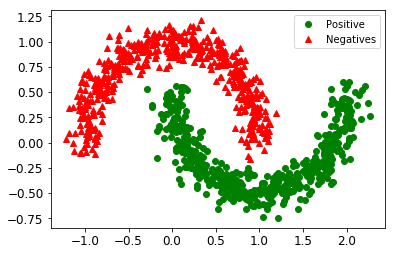

In [79]:

plt.plot(X_moons[y_moons == 1, 0],X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0],X_moons[y_moons == 0, 1], 'r^', label ="Negatives")
plt.legend()
plt.show()

In [80]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons] 

In [81]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [82]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [83]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [84]:
def random_batch(X_train, y_train, batch_size):
    rnd_indicies = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indicies]
    y_batch = y_train[rnd_indicies]
    return X_batch, y_batch

In [85]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  1.93189866,  0.13158788],
       [ 1.        ,  1.07172763,  0.13482039],
       [ 1.        , -1.01148674, -0.04686381],
       [ 1.        ,  0.02201868,  0.19079139],
       [ 1.        , -0.98941204,  0.02473116]])

In [86]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [87]:
reset_graph()

In [88]:
n_inputs = 2 

In [89]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name = "X")
y = tf.placeholder(tf.float32, shape=(None, 1),name = "y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1, 0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

In [90]:
y_proba = tf.sigmoid(logits)

In [91]:
epsilon = 1e-7 
loss = -tf.reduce_mean(y* tf.log(y_proba + epsilon) + (1-y) * tf.log(1 - y_proba + epsilon))

In [92]:
loss = tf.losses.log_loss(y, y_proba)

In [93]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [94]:
init = tf.global_variables_initializer()

In [95]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch,y:y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:",epoch,"\tLoss:",loss_val)
            
    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.865109
Epoch: 100 	Loss: 0.33539468
Epoch: 200 	Loss: 0.3041998
Epoch: 300 	Loss: 0.29116666
Epoch: 400 	Loss: 0.2843653
Epoch: 500 	Loss: 0.2799074
Epoch: 600 	Loss: 0.27772838
Epoch: 700 	Loss: 0.2759256
Epoch: 800 	Loss: 0.27537307
Epoch: 900 	Loss: 0.2748189


In [96]:
y_proba_val[:5]

array([[0.5497714 ],
       [0.7067074 ],
       [0.5198208 ],
       [0.9912498 ],
       [0.50832397]], dtype=float32)

In [97]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [98]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_test, y_pred)

0.8627450980392157

In [99]:
recall_score(y_test, y_pred)

0.8888888888888888

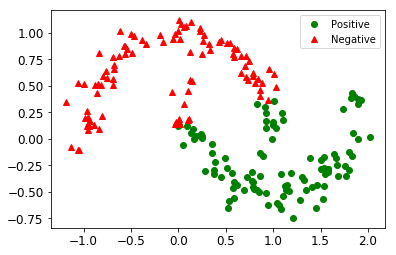

In [100]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2],'go',label="Positive")
plt.plot(X_test[~y_pred_idx, 1],X_test[~y_pred_idx, 2],'r^',label="Negative")
plt.legend()
plt.show()

In [101]:
X_train_enhanced = np.c_[X_train,
                        np.square(X_train[:, 1]),
                        np.square(X_train[:, 2]),
                        X_train[:, 1] ** 3,
                        X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [102]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

In [103]:
reset_graph()

In [104]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("model"):
        if initializer is None:
            initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
        theta = tf.Variable(initializer, name="theta")
        logits = tf.matmul(X, theta, name="logits")
        y_proba = tf.sigmoid(logits)
    with tf.name_scope("train"):
        loss = tf.losses.log_loss(y, y_proba, scope="loss")
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)
        loss_summary = tf.summary.scalar('log_loss',loss)
    with tf.name_scope("init"):
        init = tf.global_variables_initializer()
    with tf.name_scope("save"):
        saver= tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [105]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix+="-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [106]:
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1),name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init ,saver = logistic_regression(X, y) 

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [107]:
n_epochs = 10001
batch_size = 50

n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess,checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train,batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X:X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch", epoch, "\tLoss",loss_val)
            saver.save(sess,checkpoint_path)
            with open(checkpoint_epoch_path,"wb") as f:
                f.write(b"%d" % (epoch + 1))
                
    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch 0 	Loss 0.629985
Epoch 500 	Loss 0.16122364
Epoch 1000 	Loss 0.11903211
Epoch 1500 	Loss 0.097329214
Epoch 2000 	Loss 0.08369797
Epoch 2500 	Loss 0.07437584
Epoch 3000 	Loss 0.06750216
Epoch 3500 	Loss 0.062206898
Epoch 4000 	Loss 0.05802679
Epoch 4500 	Loss 0.05456297
Epoch 5000 	Loss 0.05170829
Epoch 5500 	Loss 0.04923774
Epoch 6000 	Loss 0.04716729
Epoch 6500 	Loss 0.045376636
Epoch 7000 	Loss 0.04381875
Epoch 7500 	Loss 0.042374216
Epoch 8000 	Loss 0.041089162
Epoch 8500 	Loss 0.03997092
Epoch 9000 	Loss 0.038920246
Epoch 9500 	Loss 0.038010746
Epoch 10000 	Loss 0.03715569


In [108]:
y_pred = (y_proba_val >= 0.5)

In [109]:
precision_score(y_test, y_pred)

0.9797979797979798

In [110]:
recall_score(y_test, y_pred)

0.9797979797979798

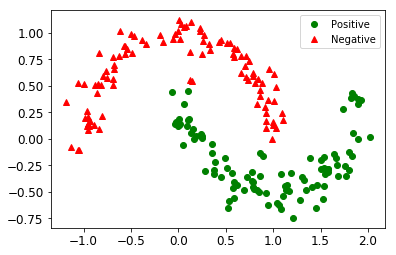

In [111]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2],'r^',label="Negative")
plt.legend()
plt.show()

In [113]:
from scipy.stats import reciprocal


n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("Iteration", search_iteration)
    print("  logdir:", logdir)
    print("  batch size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  training: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))

Iteration 0
  logdir: tf_logs/logreg-run-20190909180051/
  batch size: 52
  learning_rate: 0.004430375245218265
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 1
  logdir: tf_logs/logreg-run-20190909180240/
  batch size: 73
  learning_rate: 0.0017826497151386947
  training: .....................
  precision: 0.9696969696969697
  recall: 0.9696969696969697
Iteration 2
  logdir: tf_logs/logreg-run-20190909180406/
  batch size: 6
  learning_rate: 0.00203228544324115
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 3
  logdir: tf_logs/logreg-run-20190909181711/
  batch size: 24
  learning_rate: 0.004491523825137997
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 4
  logdir: tf_logs/logreg-run-20190909182039/
  batch size: 75
  learning_rate: 0.07963234721775589
  training: .....................
  precision: 0.9801980198019